In [1]:
import string
import re
from os import listdir
from collections import Counter
from nltk.corpus import stopwords
from keras.preprocessing.text import Tokenizer
from keras.utils.vis_utils import plot_model
from keras.models import Sequential
from keras.layers import Dense
from pandas import DataFrame
from matplotlib import pyplot

Using TensorFlow backend.


In [2]:
def load_doc(filename):
    file = open(filename, 'r')
    text = file.read()
    file.close()
    return text

def clean_doc(doc):
    tokens = doc.split()
    re_punc = re.compile('[%s]' %re.escape(string.punctuation))
    tokens = [re_punc.sub('', w) for w in tokens]
    tokens = [word for word in tokens if word.isalpha()]
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if not w in stop_words]
    tokens = [word for word in tokens if len(word) > 1]
    return tokens

def add_doc_to_vocab(filename, vocab):
    doc = load_doc(filename)
    tokens = clean_doc(doc)
    vocab.update(tokens)
    
def process_docs(directory, vocab):
    for filename in listdir(directory):
        if filename.startswith('cv9'):
            continue
        path = directory + '/' + filename
        add_doc_to_vocab(path, vocab)
    
def save_list(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w')
    file.write(data)
    file.close()


In [3]:
vocab = Counter()
process_docs('txt_sentoken/pos', vocab)
process_docs('txt_sentoken/neg', vocab)
print(len(vocab))

44276


In [4]:
min_occurane = 2
tokens = [k for k,c in vocab.items() if c >= min_occurane]
print(len(tokens))

25767


In [5]:
save_list(tokens, 'vocab.txt')

In [6]:
def doc_to_line(filename, vocab):
    doc = load_doc(filename)
    tokens = clean_doc(doc)
    tokens = [w for w in tokens if w in vocab]
    return ' '.join(tokens)

In [7]:
def process_docs(directory, vocab, is_train):
    lines = []
    for filename in listdir(directory):
        if is_train and filename.startswith('cv9'):
            continue
        if not is_train and not filename.startswith('cv9'):
            continue
        path = directory + '/' + filename
        line = doc_to_line(path, vocab)
        lines.append(line)
    return lines

In [8]:
def load_clean_dataset(vocab, is_train):
    neg = process_docs('txt_sentoken/neg', vocab, is_train)
    pos = process_docs('txt_sentoken/pos', vocab, is_train)
    docs = neg + pos
    labels = [0 for _ in range(len(neg))] + [1 for _ in range(len(pos))]
    return docs, labels

In [9]:
def create_tokenizer(lines):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(lines)
    return tokenizer

In [10]:
def define_model(n_words):
    model = Sequential()
    model.add(Dense(50, input_shape=(n_words,), activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    model.summary()
    plot_model(model, to_file='model.png', show_shapes=True)
    return model

In [11]:
def evaluate_model(X_train, ytrain, X_test, ytest):
    scores = []
    n_repeats = 10
    n_words = X_test.shape[1]
    for i in range(n_repeats):
        model = define_model(n_words)
        model.fit(X_train, ytrain, epochs=10, verbose=0)
        _, acc = model.evaluate(X_test, ytest, verbose=0)
        scores.append(acc)
        print('%d accuracy: %s' %((i+1), acc))
    return scores

In [12]:
def prepare_data(train_docs, test_docs, mode):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(train_docs)
    X_train = tokenizer.texts_to_matrix(train_docs, mode=mode)
    X_test = tokenizer.texts_to_matrix(test_docs, mode=mode)
    return X_train, X_test

In [13]:
vocab_filename = 'vocab.txt'
vocab = load_doc(vocab_filename)
vocab = set(vocab.split())

In [14]:
train_docs, ytrain = load_clean_dataset(vocab, True)
test_docs, ytest = load_clean_dataset(vocab, False)

modes = ['binary', 'count', 'tfidf', 'freq']
results = DataFrame()

for mode in modes:
    X_train, X_test = prepare_data(train_docs, test_docs, mode)
    results[mode] = evaluate_model(X_train, ytrain, X_test, ytest)

print(results.describe())






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                1288450   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 1,288,501
Trainable params: 1,288,501
Non-trainable params: 0
_________________________________________________________________

1 accuracy: 0.93
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 50)                1288450   
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 51        
Total params: 1,288,501
Trainable params: 1,288,501
Non-trainable params: 0
_____

1 accuracy: 0.875
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 50)                1288450   
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 51        
Total params: 1,288,501
Trainable params: 1,288,501
Non-trainable params: 0
_________________________________________________________________
2 accuracy: 0.895
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 50)                1288450   
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 51        
Total params: 1,288,501
Trainable params: 1,288,501
Non-trainable params: 0
_________________________________________________________________
3 accuracy: 0.915
__

5 accuracy: 0.88
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_51 (Dense)             (None, 50)                1288450   
_________________________________________________________________
dense_52 (Dense)             (None, 1)                 51        
Total params: 1,288,501
Trainable params: 1,288,501
Non-trainable params: 0
_________________________________________________________________
6 accuracy: 0.905
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_53 (Dense)             (None, 50)                1288450   
_________________________________________________________________
dense_54 (Dense)             (None, 1)                 51        
Total params: 1,288,501
Trainable params: 1,288,501
Non-trainable params: 0
_________________________________________________________________
7 accuracy: 0.855
___

9 accuracy: 0.875
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_79 (Dense)             (None, 50)                1288450   
_________________________________________________________________
dense_80 (Dense)             (None, 1)                 51        
Total params: 1,288,501
Trainable params: 1,288,501
Non-trainable params: 0
_________________________________________________________________
10 accuracy: 0.865
          binary      count      tfidf      freq
count  10.000000  10.000000  10.000000  10.00000
mean    0.932500   0.896000   0.877500   0.86750
std     0.007906   0.011255   0.015138   0.00677
min     0.920000   0.875000   0.855000   0.85500
25%     0.926250   0.890000   0.867500   0.86500
50%     0.932500   0.895000   0.880000   0.86750
75%     0.938750   0.900000   0.880000   0.87375
max     0.945000   0.915000   0.905000   0.87500


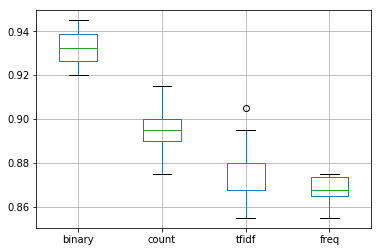

In [15]:
results.boxplot()
pyplot.show()

In [16]:
def predict_sentiment(review, vocab, tokenizer, model):
    tokens = clean_doc(review)
    tokens = [w for w in tokens if w in vocab]
    line = ' '.join(tokens)
    encoded = tokenizer.texts_to_matrix([line], mode='binary')
    yhat = model.predict(encoded, verbose=0)
    percent_pos = yhat[0,0]
    if round(percent_pos) == 0:
        return (1-percent_pos), 'NEGATIVE'
    return percent_pos, 'POSITIVE'

In [19]:
train_docs, ytrain = load_clean_dataset(vocab, True) 
test_docs, ytest = load_clean_dataset(vocab, True)

tokenizer = create_tokenizer(train_docs)
X_train = tokenizer.texts_to_matrix(train_docs, mode='binary') 
X_test = tokenizer.texts_to_matrix(test_docs, mode='binary')

n_words = X_train.shape[1] 
model = define_model(n_words)

model.fit(X_train, ytrain, epochs=10, verbose=2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_81 (Dense)             (None, 50)                1288450   
_________________________________________________________________
dense_82 (Dense)             (None, 1)                 51        
Total params: 1,288,501
Trainable params: 1,288,501
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
 - 3s - loss: 0.4952 - acc: 0.7650
Epoch 2/10
 - 1s - loss: 0.0733 - acc: 0.9922
Epoch 3/10
 - 1s - loss: 0.0179 - acc: 1.0000
Epoch 4/10
 - 1s - loss: 0.0072 - acc: 1.0000
Epoch 5/10
 - 1s - loss: 0.0036 - acc: 1.0000
Epoch 6/10
 - 1s - loss: 0.0021 - acc: 1.0000
Epoch 7/10
 - 1s - loss: 0.0014 - acc: 1.0000
Epoch 8/10
 - 2s - loss: 9.6522e-04 - acc: 1.0000
Epoch 9/10
 - 1s - loss: 7.2264e-04 - acc: 1.0000
Epoch 10/10
 - 1s - loss: 5.6500e-04 - acc: 1.0000


In [20]:
text = 'Best movie ever! It was great, I recommend it.'
percent, sentiment = predict_sentiment(text, vocab, tokenizer, model)
print('Review [%s]\nSentiment: %s (%.3f%%)' %(text, sentiment, percent*100))

text = 'This is a bad movie.'
percent, sentiment = predict_sentiment(text, vocab, tokenizer, model)
print('Review [%s]\nSentiment: %s (%.3f%%)' %(text, sentiment, percent*100))

Review [Best movie ever! It was great, I recommend it.]
Sentiment: POSITIVE (60.134%)
Review [This is a bad movie.]
Sentiment: NEGATIVE (63.742%)
